## Problem Definition
The focus of this project will be the Sonar Mines vs Rocks dataset1
. The problem is to predict
metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range
0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated
over a certain period of time. The label associated with each record contains the letter R if
the object is a rock and M if it is a mine (metal cylinder). The numbers in the labels are in
increasing order of aspect angle, but they do not encode the angle directly.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the Dataset
Let’s start off by loading the libraries required for this project.

In [2]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas import plotting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [5]:
# Load dataset
url = '/sonar.all-data.csv'
dataset = read_csv(url, header=None)

## Analyze Data
Let’s take a closer look at our loaded data

## Descriptive Statistics
We will start off by confirming the dimensions of the dataset, e.g. the number of rows and
columns

In [6]:
# shape
print(f"We have {dataset.shape[0]} instances to work with and can confirm the data has {dataset.shape[1]} attributes including the class attribute")

We have 208 instances to work with and can confirm the data has 61 attributes including the class attribute


Let’s also look at the data types of each attribute.


In [7]:
 #types
set_option('display.max_rows', 500)
print(dataset.dtypes)


0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


Let’s now take a peek at the first 20 rows of the data.

In [8]:
set_option('display.width', 100)
print(dataset.head(20))


        0       1       2       3       4       5       6       7       8       9   ...      51  \
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111  ...  0.0027   
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337  0.2872  ...  0.0084   
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598  0.6194  ...  0.0232   
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598  0.1264  ...  0.0121   
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564  0.4459  ...  0.0031   
5   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105  0.3039  ...  0.0045   
6   0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083  0.3513  ...  0.0201   
7   0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465  0.2838  ...  0.0081   
8   0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684  0.1487  ...  0.0145   
9   0.0164

In [9]:
#descriptions, change precision to 3 places
# set_option('precision', 2)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Again, as we expect, the data has the same range, but interestingly differing mean values.
There may be some benefit from standardizing the data

Let’s take a quick look at the breakdown of class values

In [10]:
# class distribution
print(dataset.groupby(60).size())


60
M    111
R     97
dtype: int64


We can see that the classes are reasonably balanced between M (mines) and R (rocks).


## Unimodal Data Visualizations
Let’s look at visualizations of individual attributes. It is often useful to look at your data
using multiple different visualizations in order to spark ideas. Let’s look at histograms of each
attribute to get a sense of the data distributions.

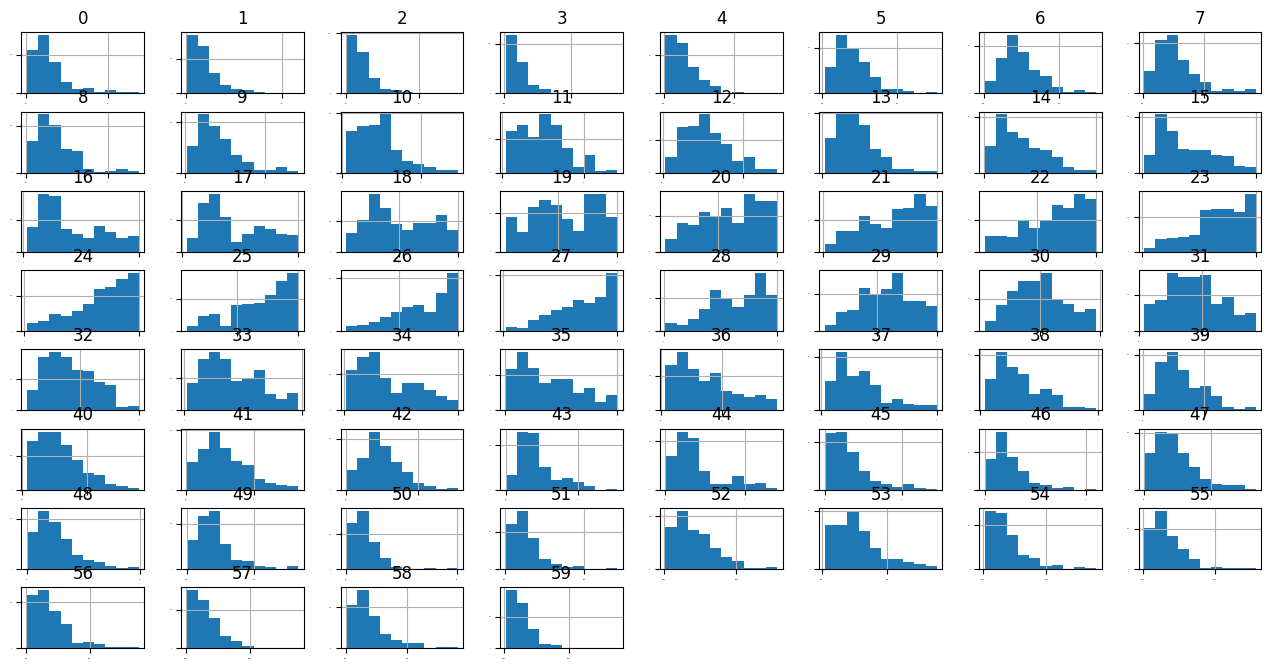

In [11]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(16,8), layout=(8,8))
pyplot.show()

We can see that there are a lot of Gaussian-like distributions and perhaps some exponentiallike distributions for other attributes.

Let’s take a look at the same perspective of the data using density plots.

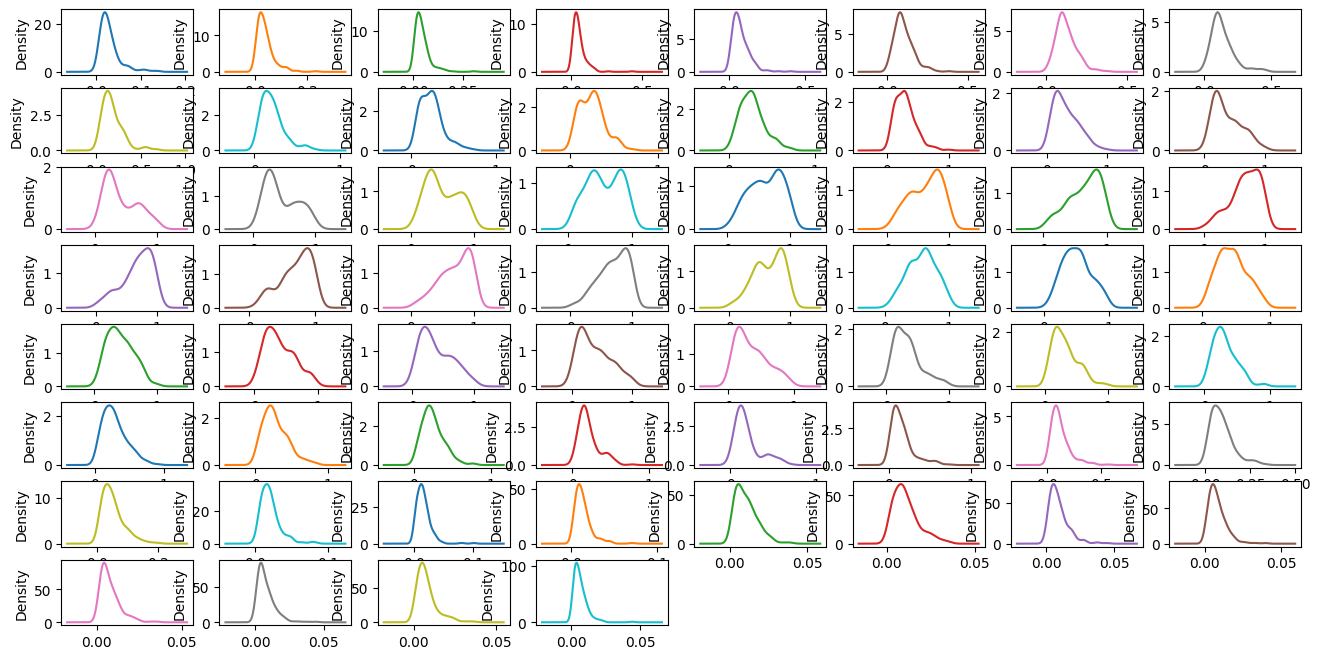

In [13]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, figsize=(16,8),
fontsize=10)
pyplot.show()

This is useful, you can see that many of the attributes have a skewed distribution. A power
transform like a Box-Cox transform that can correct for the skew in distributions might be
useful.

It is always good to look at box and whisker plots of numeric attributes to get an idea of
the spread of values.

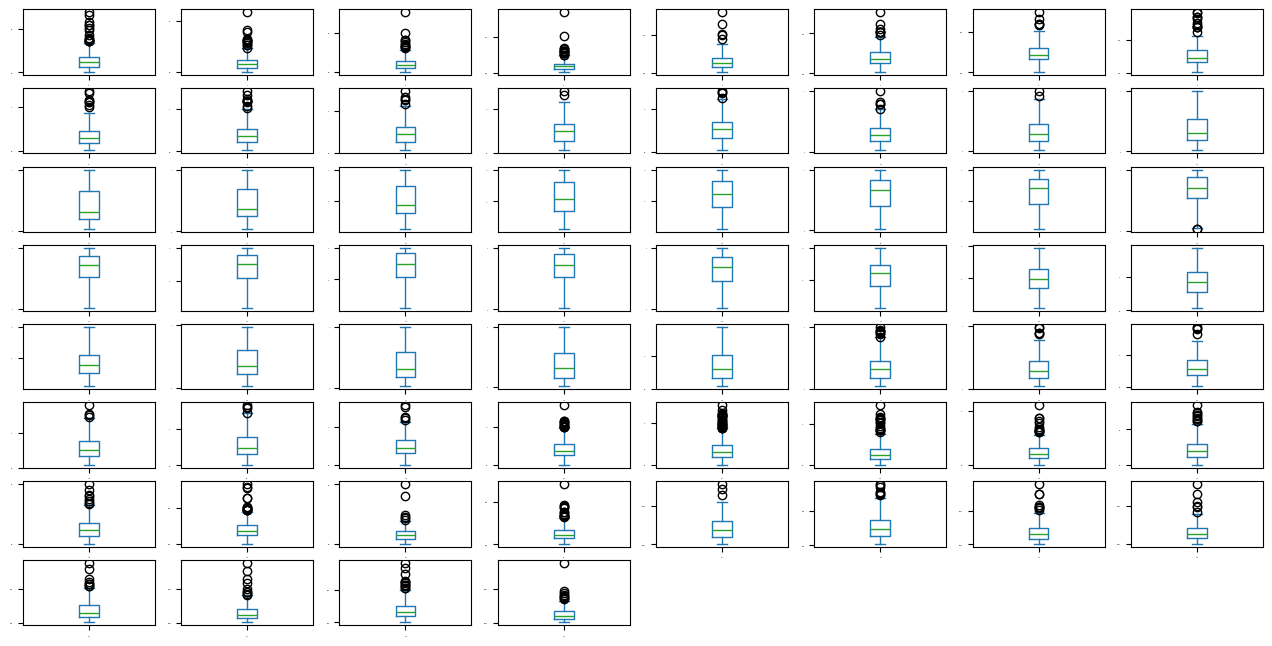

In [14]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, figsize=(16,8),
fontsize=1)
pyplot.show()

We can see that attributes do have quite different spreads. Given the scales are the same, it
may suggest some benefit in standardizing the data for modeling to get all of the means lined
up

## Multimodal Data Visualizations
Let’s visualize the correlations between the attributes.

In [16]:
import numpy as np
np.where(dataset[60]=='R', 1, 0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
from sklearn.preprocessing import LabelEncoder

# '60' column has values 'M' and 'R'
le = LabelEncoder()
dataset[60] = le.fit_transform(dataset[60])

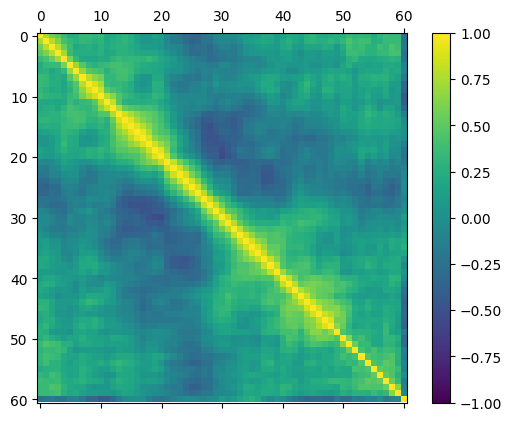

In [18]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()


In [ ]:
import seaborn as sns
#plt.figure(figsize= [8,6])
# fig, ax = pyplot.subplots(figsize=(8,6))
# corr = dataset.corr()
# sns.heatmap(corr, cbar=False, annot=True)
# fig.savefig('correlation.jpg')

## Validation Dataset
It is a good idea to use a validation hold-out set. This is a sample of the data that we hold
back from our analysis and modeling. We use it right at the end of our project to confirm the
accuracy of our final model. It is a smoke test that we can use to see if we messed up and to
give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset
for modeling and hold back 20% for validation.

In [19]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_testn = train_test_split(X, y,
test_size=validation_size, random_state=seed)

## Evaluate Algorithms: Baseline
We don’t know what algorithms will do well on this dataset. Gut feel suggests distance based
algorithms like k-Nearest Neighbors and Support Vector Machines may do well. Let’s design
our test harness. We will use 10-fold cross validation. The dataset is not too small and this is
a good standard test harness configuration. We will evaluate algorithms using the accuracy
metric. This is a gross metric that will give a quick idea of how correct a given model is. More
useful on binary classification problems like this one.

In [22]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

Let’s create a baseline of performance on this problem and spot-check a number of different
algorithms. We will select a suite of different algorithms capable of working on this classification
problem. The six algorithms selected include:
 Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).
 Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [20]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

The algorithms all use default tuning parameters. Let’s compare the algorithms. We will
display the mean and standard deviation of accuracy for each algorithm as we calculate it and
collect the results for use later.

In [23]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.2f} ({cv_results.std():.2f})"
    print(msg)

LR: 0.77 (0.09)
LDA: 0.78 (0.09)
KNN: 0.76 (0.11)
CART: 0.75 (0.07)
NB: 0.68 (0.14)
SVM: 0.77 (0.09)


The results suggest That both LDA, Logistic
Regression and SVM may be worth further study.


These are just mean accuracy values. It is always wise to look at the distribution of accuracy
values calculated across cross validation folds. We can do that graphically using box and whisker
plots

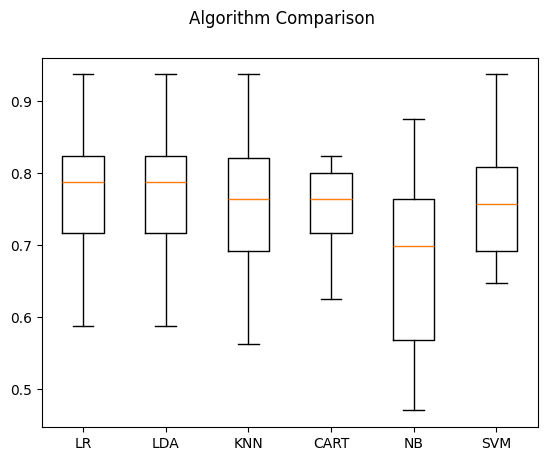

In [24]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


The results show a tight distribution for LDA which is encouraging, suggesting low variance.
The poor results for NB are surprising

It is possible that the varied distribution of the attributes is having an effect on the accuracy
of algorithms such as NB.

In the next section we will repeat this spot-check with a standardized
copy of the training dataset.

## Evaluate Algorithms: Standardize Data
We suspect that the differing distributions of the raw data may be negatively impacting the skill
of some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the
dataset. This is where the data is transformed such that each attribute has a mean value of zero
and a standard deviation of one. We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross validation test harness. That way we can get a fair estimation
of how each model with standardized data might perform on unseen data.


In [25]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: 0.754412 (0.067926)
ScaledLDA: 0.778676 (0.093570)
ScaledKNN: 0.808456 (0.107996)
ScaledCART: 0.716912 (0.116550)
ScaledNB: 0.682721 (0.136040)
ScaledSVM: 0.826103 (0.081814)


We can see that KNN is still doing
well, even better than before. We can also see that the standardization of the data has lifted
the skill of SVM to be the most accurate algorithm tested so far

Again, we should plot the distribution of the accuracy scores using box and whisker plots.

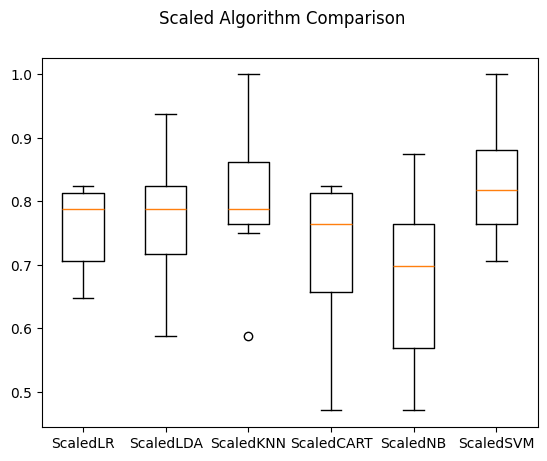

In [26]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The results suggest digging deeper into the SVM and KNN algorithms. It is very likely that
configuration beyond the default may yield even more accurate models

## Algorithm Tuning
In this section we investigate tuning the parameters for two algorithms that show promise from
the spot-checking in the previous section: KNN and SVM.

## Tuning KNN
We can start off by tuning the number of neighbors for KNN. The default number of neighbors
is 7. Below we try all odd values of k from 1 to 21, covering the default value of 7. Each k value
is evaluated using 10-fold cross validation on the training standardized dataset.

In [27]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print(f'{mean:.2f}, {stdev:.2f}, {param}')
import pandas as pd
pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").head()

Best: 0.836029 using {'n_neighbors': 1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001133,0.000315,0.002975,0.002318,1,{'n_neighbors': 1},0.823529,0.941176,0.764706,0.941176,0.882353,0.882353,0.8125,0.6875,0.7500,0.8750,0.836029,0.079487,1
2,0.001281,0.000932,0.003868,0.002974,5,{'n_neighbors': 5},0.941176,0.764706,0.764706,0.764706,0.823529,0.647059,1.0000,0.7500,0.8125,0.8750,0.814338,0.096870,2
1,0.001017,0.000089,0.006183,0.005153,3,{'n_neighbors': 3},0.882353,0.705882,0.823529,0.823529,0.823529,0.764706,1.0000,0.7500,0.6875,0.8750,0.813603,0.088021,3
3,0.001006,0.000058,0.002057,0.000316,7,{'n_neighbors': 7},0.941176,0.588235,0.823529,0.764706,0.764706,0.705882,1.0000,0.7500,0.6250,0.8125,0.777574,0.120387,4
5,0.001265,0.000720,0.005193,0.006377,11,{'n_neighbors': 11},0.823529,0.588235,0.764706,0.705882,0.705882,0.764706,0.8750,0.7500,0.6875,0.7500,0.741544,0.073970,5


We can see the configuration that resulted in the highest accuracy as well as the accuracy
of all values tried.


Also, the optimal configuration is K=1. This is interesting as the algorithm will
make predictions using the most similar instance in the training dataset alone.


## Tuning SVM
We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the
margin) and the type of kernel. The default for SVM (the SVC class) is to use the Radial
Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid
search using 10-fold cross validation with a standardized copy of the training dataset. We will
try a number of simpler kernel types and C values with less bias and more bias (less than and
more than 1.0 respectively)

In [28]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print(f"Best: {grid_result.best_score_:.2f}, {grid_result.best_params_}")
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print(f"{mean:.2f} ({stdev:.2f}) with: {param}")
import pandas as pd
pd.DataFrame(grid_result.cv_results_).sort_values("rank_test_score").head()

Best: 0.85, {'C': 1.7, 'kernel': 'rbf'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
34,0.002494,0.000055,0.001084,0.000031,1.7,rbf,"{'C': 1.7, 'kernel': 'rbf'}",0.941176,0.705882,0.882353,0.823529,0.882353,0.764706,0.9375,0.8125,0.750,1.0000,0.850000,0.089841,1
38,0.002483,0.000038,0.001060,0.000018,2.0,rbf,"{'C': 2.0, 'kernel': 'rbf'}",0.941176,0.764706,0.823529,0.823529,0.882353,0.764706,0.9375,0.8125,0.750,1.0000,0.850000,0.081776,1
30,0.002433,0.000121,0.001114,0.000094,1.5,rbf,"{'C': 1.5, 'kernel': 'rbf'}",0.941176,0.705882,0.882353,0.823529,0.823529,0.764706,0.9375,0.8125,0.750,1.0000,0.844118,0.089455,3
37,0.002294,0.000356,0.001033,0.000135,2.0,poly,"{'C': 2.0, 'kernel': 'poly'}",0.823529,0.764706,0.882353,0.764706,0.705882,0.823529,0.9375,0.8750,0.875,0.9375,0.838971,0.072879,4
33,0.002144,0.000173,0.001052,0.000195,1.7,poly,"{'C': 1.7, 'kernel': 'poly'}",0.882353,0.705882,0.882353,0.764706,0.705882,0.823529,0.9375,0.8750,0.875,0.9375,0.838971,0.081826,4


We can see the most accurate configuration was SVM with an RBF kernel and a C value
of 1.7. The accuracy 85% is seemingly better than what KNN could achieve.


## Ensemble Methods
Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:
 Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
 Bagging Methods: Random Forests (RF) and Extra Trees (ET).
We will use the same test harness as before, 10-fold cross validation. No data standardization
is used in this case because all four ensemble algorithms are based on decision trees that are
less sensitive to data distribution

In [29]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AB: 0.782721 (0.072445)
GBM: 0.789706 (0.130375)
RF: 0.826103 (0.072251)
ET: 0.844118 (0.059853)


We can see that both random forest classifier and extra tree classifier techniques provide strong accuracy scores in the low 80s (%)
with default configurations. We can plot the distribution of accuracy scores across the cross
validation folds.

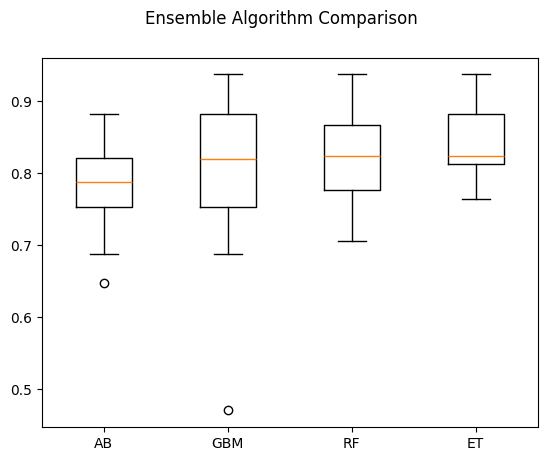

In [30]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The box plot visualization effectively highlights ET as the best performer due to its high median and narrow IQR

## Finalize Model
The ET showed the most promise as a low complexity and stable model for this problem. In
this section we will finalize the model by training it on the entire training dataset and make
predictions for the hold-out validation dataset to confirm our findings.

In [31]:
from sklearn.pipeline import make_pipeline
import numpy as np
et =  ExtraTreesClassifier(random_state=42)
et_model = make_pipeline(
    StandardScaler(),
    et
)
#hyperparameters
params= {
    "extratreesclassifier__max_depth":np.arange(10, 100, 10),
    "extratreesclassifier__n_estimators":np.arange(50, 500, 50),
    'extratreesclassifier__min_samples_split': [2, 5, 10],
    'extratreesclassifier__max_features': ['sqrt', 'log2']
}

In [32]:
from sklearn.model_selection import GridSearchCV
model_et = GridSearchCV(et_model, param_grid=params, n_jobs=-1, verbose=1, cv=10)
model_et.fit(X_train, y_train)

Fitting 10 folds for each of 486 candidates, totalling 4860 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('extratreesclassifier',
                                        ExtraTreesClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'extratreesclassifier__max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                         'extratreesclassifier__max_features': ['sqrt', 'log2'],
                         'extratreesclassifier__min_samples_split': [2, 5, 10],
                         'extratreesclassifier__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
             verbose=1)

In [36]:
model_et_best = model_et.best_score_

In [37]:
model_et_best

0.9029411764705882

In [40]:
y_test_pred = model_et.predict(X_test)

In [41]:
predicted_values = pd.DataFrame({"y_test": y_testn, "y_pred_test": y_test_pred}).reset_index(drop=True)
predicted_values.head()

,y_test,y_pred_test
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [42]:
test_accuracy = (accuracy_score(y_testn, y_test_pred))
test_accuracy

0.9047619047619048

In [43]:
class_report = classification_report(y_testn, y_test_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        27
         1.0       0.87      0.87      0.87        15

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [34]:
model_et.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_depth=20, random_state=42))])

In [44]:
model_et.best_params_

{'extratreesclassifier__max_depth': 20,
 'extratreesclassifier__max_features': 'sqrt',
 'extratreesclassifier__min_samples_split': 2,
 'extratreesclassifier__n_estimators': 100}

In [46]:
best_max_depth = model_et.best_params_['extratreesclassifier__max_depth']
best_n_estimators = model_et.best_params_['extratreesclassifier__n_estimators']
min_samples_splitted = model_et.best_params_['extratreesclassifier__min_samples_split']
max_featured = model_et.best_params_['extratreesclassifier__max_features']
best_max_depth, best_n_estimators

(20, 100)

In [53]:
# prepare the model
import joblib

# Train the final Extra Trees model
model = ExtraTreesClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                             min_samples_split=min_samples_splitted,max_features=max_featured)
model.fit(X, y)

# Save the model
joblib.dump(model, 'final_extra_trees_model.joblib')


['final_extra_trees_model.joblib']

 In this project, I undertook a comprehensive machine learning classification task using Python, focusing on Sonar return data. The process involved:

Data Exploration and Analysis: Analyzing the dataset, including feature scaling and distribution analysis.
Algorithm Evaluation: Assessing the performance of various algorithms, initially favoring K-Nearest Neighbors (KNN).
Feature Engineering and Algorithm Tuning: Implementing standardization to improve model performance, optimizing KNN and Support Vector Machines (SVM) hyperparameters.
Ensemble Techniques: Experimenting with Bagging and Boosting techniques to further enhance model accuracy.
Model Finalization: Training the optimal model on the entire training dataset and validating its performance on a separate validation set.
